In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

Importing libaraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,MaxPooling2D,Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

creating training and testing dataset

In [ ]:
train_dir='/content/Train'
test_dir='/content/Test'
Seed =10
img_height=64
img_width=64
img_shape=(img_height,img_width)
batch_size = 128
epochs= 5
learn_rate=0.00003

In [ ]:
crime_types=os.listdir(train_dir)
n=len(crime_types)

In [ ]:
crimes={}
train=test=0
for clss in crime_types:
  num=len(os.listdir(os.path.join(train_dir,clss)))
  train+=num
  test+=len(os.listdir(os.path.join(test_dir,clss)))
  crimes[clss]=num

data visualization

([<matplotlib.patches.Wedge at 0x7fb5f60a5e10>,
 [Text(-1.1615504401079835, 0.3013313377080951, 'Training data'),
  Text(1.1615504189484738, -0.3013314192722449, 'test data')],
 [Text(-0.5807752200539917, 0.15066566885404753, '91.9%'),
  Text(0.5807752094742369, -0.1506657096361224, '8.1%')])

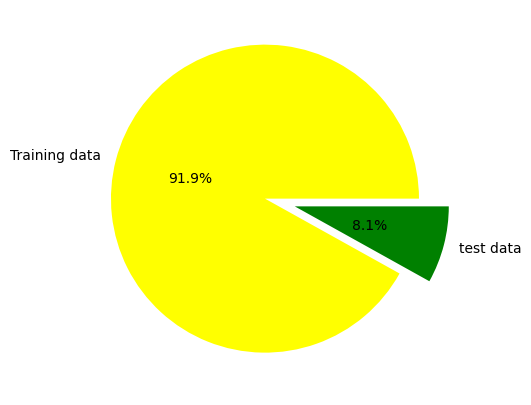

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=np.array([train,test]),autopct="%0.1f%%", explode=[0.1,0.1], labels=["Training data","test data"],pctdistance=0.5,colors=["yellow","green"])

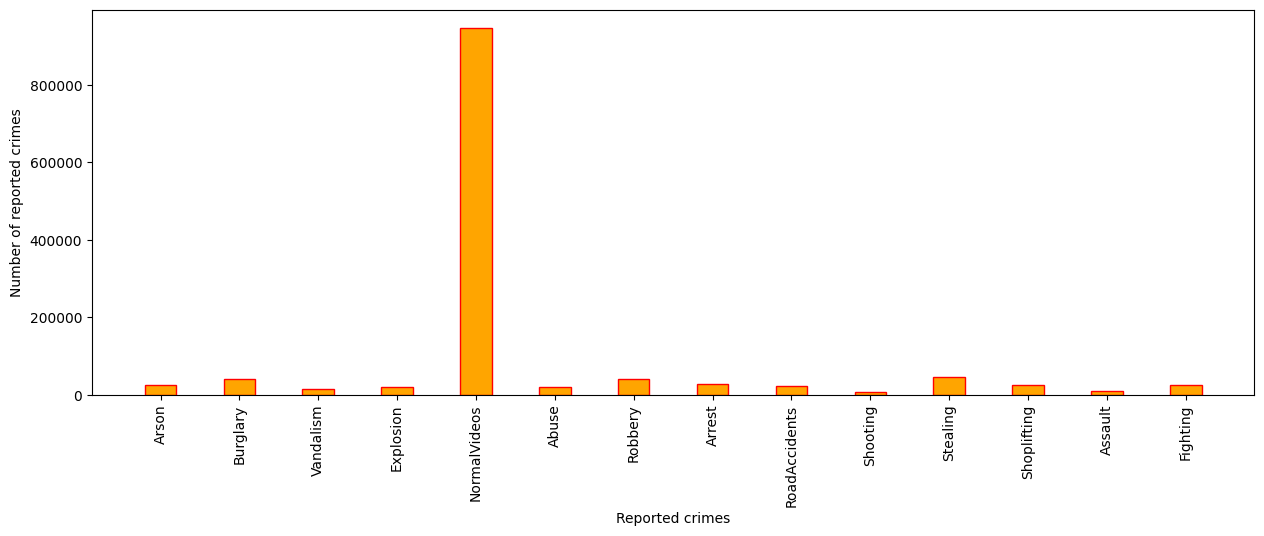

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(list(crimes.keys()),list(crimes.values()),width=0.4,align="center",edgecolor=["red"],color=["orange"])
plt.xticks(rotation=90)
plt.xlabel("Reported crimes")
plt.ylabel("Number of reported crimes")
plt.show()

In [ ]:
list(crimes.keys())

['Arson',
 'Burglary',
 'Vandalism',
 'Explosion',
 'NormalVideos',
 'Abuse',
 'Robbery',
 'Arrest',
 'RoadAccidents',
 'Shooting',
 'Stealing',
 'Shoplifting',
 'Assault',
 'Fighting']

In [ ]:
train_set=image_dataset_from_directory(train_dir,
                                       label_mode="categorical",
                                       batch_size=batch_size,
                                       image_size=(224,224),
                                       shuffle=True,
                                       seed=Seed,
                                       validation_split=0.2,
                                       subset="training",
                                       )

Found 1266345 files belonging to 14 classes.
Using 1013076 files for training.


In [ ]:
val_set=image_dataset_from_directory(train_dir,
                                       label_mode="categorical",
                                       batch_size=batch_size,
                                       image_size=(224,224),
                                       shuffle=True,
                                       seed=Seed,
                                       validation_split=0.2,
                                       subset="validation",
                                       )

Found 1266345 files belonging to 14 classes.
Using 253269 files for validation.


In [ ]:
test_set=image_dataset_from_directory(test_dir,
                                      label_mode="categorical",
                                      class_names=None,
                                      batch_size=batch_size,
                                      image_size=(224,224),
                                      shuffle=False,
                                      seed=Seed,
                                      )

Found 111308 files belonging to 14 classes.


model building


In [ ]:
def transfer_learning():
  base_model=DenseNet121(include_top=False,input_shape=(224,224,3),weights="imagenet")
  thr=149
  for layers in base_model.layers[:thr]:
    layers.trainable=False
  for layers in base_model.layers[thr:]:
    layers.trainable=False
  return base_model

In [ ]:
def create_model():
  model=Sequential()

  base_model=transfer_learning()
  model.add(base_model)

  model.add(GlobalAveragePooling2D())

  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(1024,activation="relu"))

  model.add(Dense(n,activation="softmax"))

  model.summary()

  return model

In [ ]:
model=create_model()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

model training

In [ ]:
history=model.fit(x=train_set,validation_data=val_set,epochs=epochs)

Epoch 1/5
7915/7915 [==============================] - 3595s 451ms/step - loss: 0.2922 - accuracy: 0.9161 - val_loss: 0.0955 - val_accuracy: 0.9732
Epoch 2/5
7915/7915 [==============================] - 3587s 453ms/step - loss: 0.1484 - accuracy: 0.9570 - val_loss: 0.0537 - val_accuracy: 0.9860
Epoch 3/5
7915/7915 [==============================] - 3590s 453ms/step - loss: 0.1245 - accuracy: 0.9647 - val_loss: 0.0418 - val_accuracy: 0.9888
Epoch 4/5
7915/7915 [==============================] - 3594s 454ms/step - loss: 0.1128 - accuracy: 0.9683 - val_loss: 0.0358 - val_accuracy: 0.9905
Epoch 5/5
7915/7915 [==============================] - 3603s 455ms/step - loss: 0.1063 - accuracy: 0.9708 - val_loss: 0.0349 - val_accuracy: 0.9908


In [ ]:
model.save('crime_vision.h5')

model testing

In [ ]:
from tensorflow.keras.models import load_model
model.load_weights('/content/crime_vision.h5')

In [ ]:
y_true= np.array([])
for x,y in test_set:
  y_true=np.concatenate([y_true,np.argmax(y.numpy(),axis=-1)])

In [ ]:
y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [ ]:
y_pred=model.predict(test_set)
y_pred

870/870 [==============================] - 318s 364ms/step


array([[1.99983232e-02, 5.73431924e-02, 2.12578125e-05, ...,
        7.11872303e-08, 1.47607017e-04, 8.64453614e-02],
       [2.32983450e-03, 5.90169393e-02, 1.05944884e-04, ...,
        4.57320448e-06, 4.51269792e-04, 8.85519832e-02],
       [2.97827665e-02, 2.03254726e-02, 8.66446862e-05, ...,
        4.07931999e-08, 5.48658572e-05, 2.91068237e-02],
       ...,
       [9.97288059e-03, 1.36954542e-02, 4.29670513e-03, ...,
        1.08748488e-02, 1.65991876e-02, 1.70602649e-02],
       [1.17110496e-03, 3.19995149e-03, 4.68374958e-04, ...,
        1.42179790e-03, 1.50859926e-03, 2.60921987e-03],
       [4.03818529e-04, 1.43140217e-03, 2.94161728e-04, ...,
        1.63266144e-03, 7.99658708e-04, 1.26704236e-03]], dtype=float32)

In [ ]:
import keras.utils as image
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
img= image.load_img("/content/Test/Abuse/Abuse028_x264_0.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Abuse','Explosion','Robbery','Burglary','Shooting','Shoplifting','RoadAccidents']
print(pred)
op[pred]

1/1 [==============================] - 3s 3s/step
7


'Abuse'

In [ ]:
img= image.load_img("/content/Test/Abuse/Abuse028_x264_0.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Arrest','Vandalism','Assault','Stealing','Arson','NormalVideos','Abuse','Explosion','Robbery','Burglary','Shooting','Shoplifting','RoadAccidents']
op[pred]

1/1 [==============================] - 0s 99ms/step


'Abuse'